## El MPL (Multilayer Perceptron), Foward Propagation


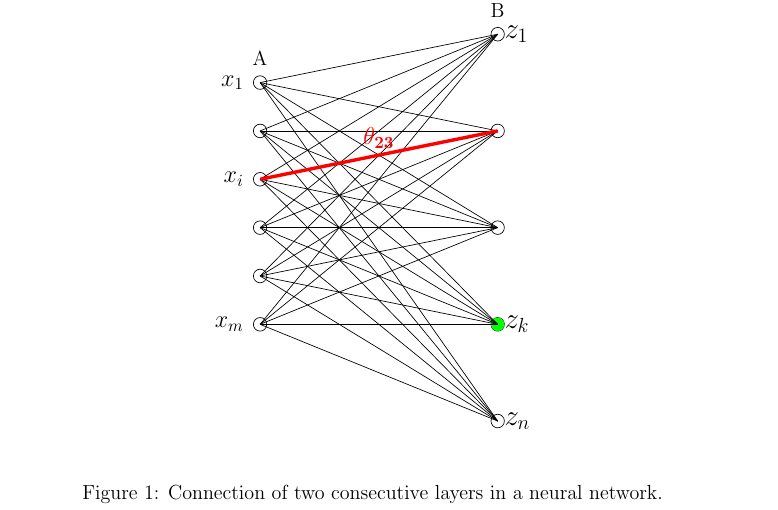
### Motivacion de la definicion de producto de matrices a traves de ANN
### Varios nodos de entrada, varios ocultos, uno de salida

La contribucion a $z_k$ esta dada por

$$ z_k = \sum_{i=1}^m x_i \theta_{ki} = \sum_{i=1}^m
\theta_{ki} x_i  .$$


En forma matricial


$$ z = \Theta x .$$
donde $z=(z_1, \cdots, z_n)^T$, $x=(x_1, \cdots, x_m)$. $\Theta=(\theta_{ij})$
$i=1, \cdots n$, $j=1 \cdots m$


Pensemos ahora que los $x_i$ son vectores (columnas) de una matriz $X$

entonces por cada columna podemos hacer el mismo proceso
$X = [x_1 | x_2 | \cdots | x_p ] $

\begin{eqnarray}
z_1 &=& \Theta x_1 \\
z_2 &=& \Theta x_2 \\
&\vdots &  \\
z_p &=& \Theta x_p
\end{eqnarray}
Los $z_i$ tambien son vectores columnas cada vector en $n$ dimensiones.

Entonces matricialmente tenemos


$$ Z = \Theta X .$$

Donde $Z \in \mathbb{R}^{n \times p}$, $\Theta \in \mathbb{R}^{n \times m}$ y $X \in \mathbb{R}^{m \times p}$.


## Varios nodos de entrada , varios ocultos y uno de salida.

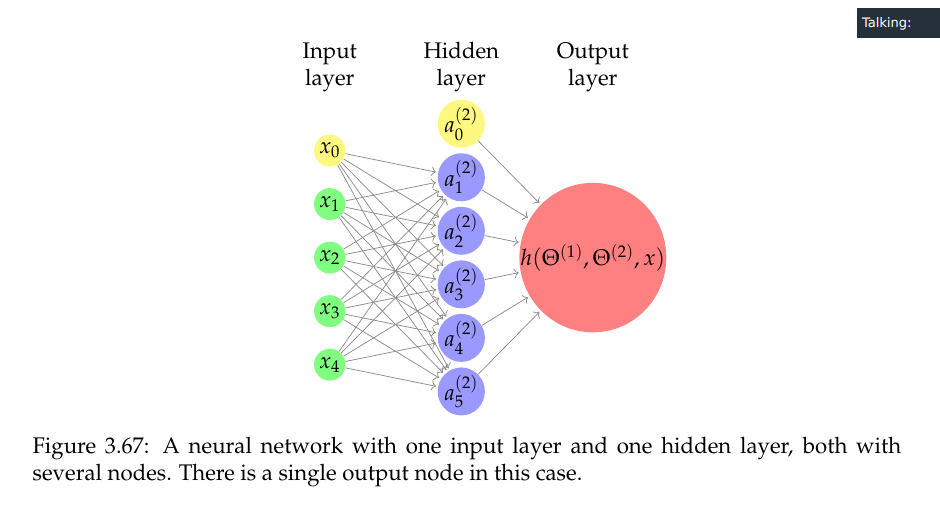


Los nodos (neuronas) amarillos represental el **bias** (esto lo explico mas adelante).

La propagacion seria de la siguiente forma.

* **Capa 2**:

\begin{eqnarray}
z_1^{(2)} &=& \sum_{j=0}^n x_j \theta_{j1}^{(1)} \\
z_2^{(2)} &=& \sum_{j=0}^n x_j \theta_{j2}^{(1)} \\
&\vdots & \\
z_5^{(2)} &=& \sum_{j=0}^n x_j \theta_{j5}^{(1)} \\
\end{eqnarray}

En general para $p$ nodos ocultos
$$ z_i^{(2)} = \sum_{j=0}^n x_j \theta_{ji}^{(1)}  \quad i=1,2, \cdots, p.$$

Si lo llevamos a forma matricial


$$ z^{(2)} = x^T  \Theta^{(1)}.$$

Este es un vector fila. Si lo queremos como vector columna, se puede transponer.

Es decir


$$ z^{(2)} = (\Theta^{(1)})^T x. $$


**construccion de las activaciones**

\begin{eqnarray}
a_0^{(2)} &=& 1 \\
a_j^{(2)}( x, \Theta_i^{(1)}) &=& \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}}
\quad , \quad i = 1,2, \cdots, p
\end{eqnarray}

* **Capa 3**:

$$z^{(3)} = \sum_{j=0}^{p} a_j^{(2)} \theta_j^{(2)} .$$

Finalmente la activacion en este punto es la hipotesis


$$ h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} .$$




## varios nodos de entrada, varios ocultos y varios de salida.

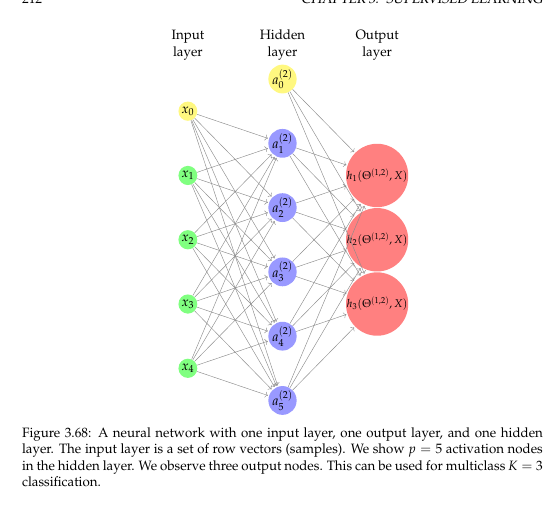

* **Capa 2**:

$$ z_i^{(2)} = x^T \Theta_i^{(1)} \quad , i=1,2, \cdots, p .$$
donde $\Theta_i^{(1)}$ es la columnda $i$ de la matriz $\Theta^{(1)}$.
En notacion de componentes

$$ z_j^{(2)} = \sum_{k=0}^n x_k \theta_{ki}^{(1)} .$$

Aplicamos la activacion


$$a_i^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_i^{2)}}}  \quad , \quad i=1,2, \cdots , p  \quad , a_0^{(2)}=1.$$


* **Capa 3**

$$ z_i^{(3)} = \sum_{k=0}^p a_k^{(2)} \theta_{ki}^{(2)} .$$
matricialmente


$$ z_i^{(3)} = a^{(2)} \Theta_i^{(2)}.$$
pensando en $a^{(2)}$ como un vector fila. Observe que


$$\Theta^{(2)}_{(p+1) \times 3} .$$




### El caso donde todos los nodos de entrada son vectores, se convierte en multiplicaciones de matrices seguidas por activaciones.  No vemos los detalles aca, pero son faciles de abstraer.

El caso se pude dar cuando se cargan imagnes de pixeles en $x-y$ pero con varios canales, por ejemplo RGB (Red-Green-Blue), CMYK (Cian-Magenta-Yello-Black), HSV, etc.

Con esto estamos listos para formular el algoritmo de propagacion hacia adelante.

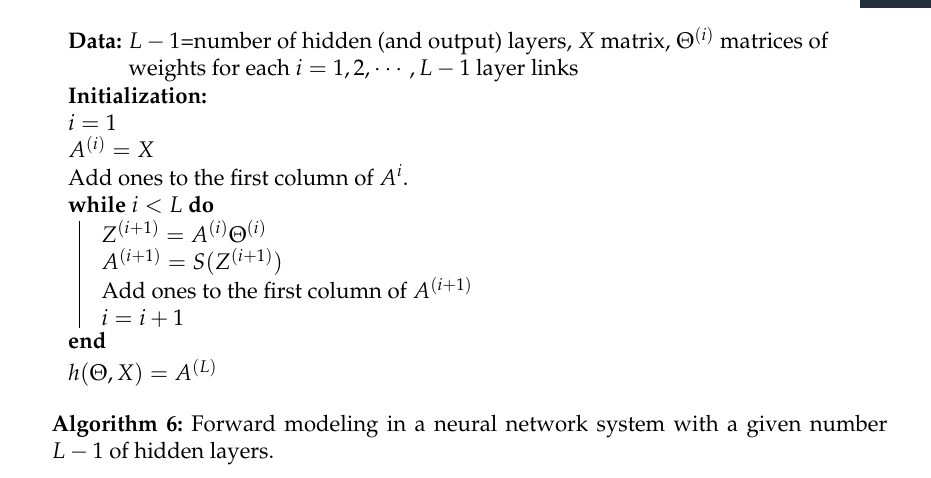

### Bias:
El papel del "bias" es del intercepto $\theta_0$, decir que no hay bias, es como decir que todos los modelos pasan por el origen.
Como complemento a esta seccion sugiero visitar
[StackOverflow](https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks) .



La siguiente figura muestra la sigmoid con o sin bias.

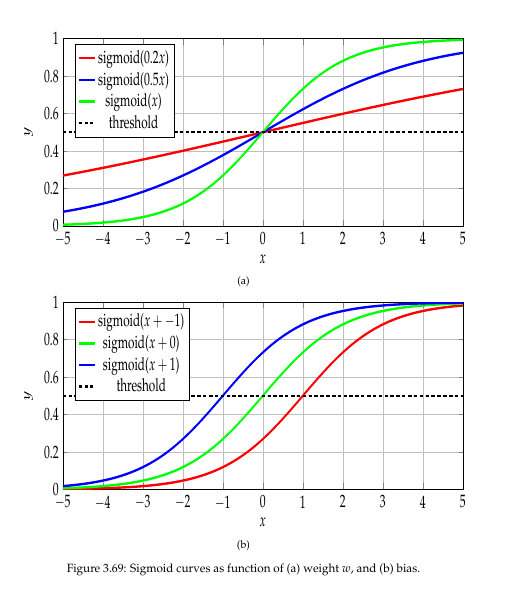


En la figura de arriba no hay **bias**. Todas las sigmoids pasan por origen. En la segunda si hay **bias** vemos como solo la del centro pasa por origen y las otras dos no.


Una situacion donde necesitamos que la hipotesis sea muy pequena $\approx 0$ es usando un $\theta_0 \gg 1$a ($\theta_0$ es el bias). De forma que


$$ \frac{1}{1 + \mathrm{e}^{-\sum_{i=0}^n  \theta_i x_i}} \to 0 .$$
cuando $\theta_0 + \sum_{i=1}^n \theta_i x_i \gg 1$
por que
$-\theta_0 \ll  - \sum_{i=1}^n \theta_i x_i $.

Regresemos al XOR. Recuerden que este modelo no funciono con el modelo de McCulloch-Pits

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ xor } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | ? | 0 |
| 1 | 0 | 1 | ? | 1 |
| 0 | 1 | 1 | ? | 1 |
| 0 | 0 | 0 | ? | 0 |



La salida de este sistema logico (XOR) la definimos como


\begin{eqnarray}
y = \left \{
    \begin{array}{cc}
    1 & \text{ si   } h(\Theta, X) \ge \text{umbral} \\
    0 & \text{ de lo contrario}
    \end{array}
    \right .
\end{eqnarray}

Construimos un modelo (ANN) de 3 capas que resuelve el problema del XOR.



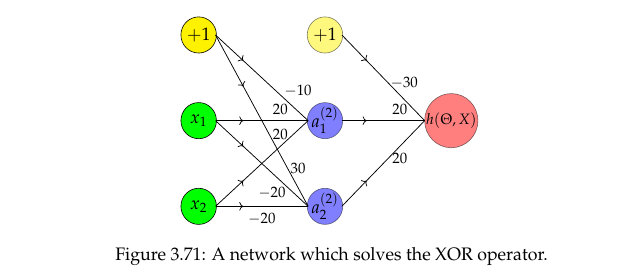

Ojo a la notacion.

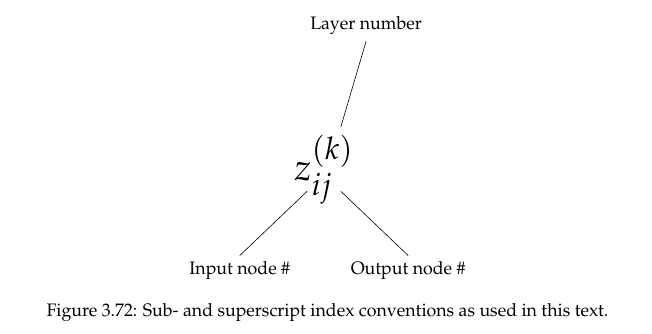


Son cuatro casos:

1. Para $(x_1, x_2)=(1,1) $:

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 30 , \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e^{-30}}} \approx 1 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = -10  \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{10}}
\approx 0.0000454.
\end{eqnarray}

Vamos para la capa 3


\begin{eqnarray}
z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -9.999092.
\end{eqnarray}

De forma que


$$h(\Theta, x^{(1)}) = S(z_{11}^{(3)}) = 0.00000454 .$$

Asumimos el umbral $\gamma=0.5$ y con este umbral obtenemos

$$\left .  y \right |_{(1,1)} = 0 .$$

2. Segundo caso $(x_1, x_2) = (1, 0)$:\begin{eqnarray}
z_{21}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 10 , \\
a_{21}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e^{-10}}} \approx 0.999955 \\
z_{22}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 10  \\
a_{22}^{(2)} &=& S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-10}}
\approx 0.999955.
\end{eqnarray}

Vamos para la capa 3


\begin{eqnarray}
z_{21}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -10
\end{eqnarray}

De forma que


$$h(\Theta, x^{(1)}) = S(z_{21}^{(3)}) = 0.999955 > 0.5$$

Asumimos el umbral $\gamma=0.5$ y con este umbral obtenemos

$$\left .  y \right |_{(1,0)} = 1 .$$



Proxima clase.

* Analizar los caso $(0,1), (0,0)$
* Hacerlo en Python de forma matricial.